# Linear-Quadratic Dynamic Game

As shown in Proposition 2 in [1], the receding horizon open-loop Nash equilibria (NE) can be reformulated as a non-symmetric variational inequality. Specifically, consider a set of agents $\mathcal{N} = \{1,\dots,N\}$ characterizing a state vector $\mathbf{x}[t] \in \mathbb{R}^n$, whose (linear) dynamics is described as

$$
\begin{equation}
    \mathbf{x}[t+1] = \mathbf{A}\mathbf{x}[t] + \sum_{i \in \mathcal{N}} \mathbf{B}_i \mathbf{u}_i[t]
\end{equation}
$$

for $t = 1, \dots, T$. Each agent $i$ selfishly tries to choose $\mathbf{u}_i[t] \in \mathbb{R}^m$ in order to minimize the following cost function

$$
\begin{equation}
    J_i(\mathbf{u}_i|\mathbf{x}_0, \mathbf{u}_{-i}) = \frac{1}{2}\sum_{t=0}^{T-1} \|\mathbf{x}[t|\mathbf{x}_0, \mathbf{u}]\|^2_{\mathbf{Q}_i} + \|\mathbf{u}_i[t] \|^2_{\mathbf{R}_i}
\end{equation}
$$

for some $0 \preceq \mathbf{Q}_i \in \mathbb{R}^{n \times n}$ and $0 \prec \mathbf{R}_i \in \mathbb{R}^{m \times m}$, with $\mathbf{u}_{-i} = \text{col}(\mathbf{u}_j)_{j \in \mathcal{N}\setminus \{i\}}$ and $\mathbf{u}_j = \text{col}(\mathbf{u}_j[t])_{t=1}^T$. Moreover, $\mathbf{u} = \text{col}(\mathbf{u}_i)_{i \in \mathcal{N}}$. The set of feasible inputs, for each agent $i \in \mathcal{N}$, is $\mathcal{U}_i(\mathbf{x}_0,\mathbf{u}_{-i}) := \{\mathbf{u}_i \in \mathbb{R}^{mT} : \mathbf{u}_i[t] \in \mathcal{U}_i(\mathbf{u}_{-i}[t]), \ \forall t = 0,\dots,T-1; \ \mathbf{x}[t|\mathbf{x}_0, \mathbf{u}] \in \mathcal{X}, \ \forall t = 1,\dots,T\}$, where $\mathcal{X} \in \mathbb{R}^n$ is the set of feasible system states. Finally, $\mathcal{U}(\mathbf{x}_0) = \{\mathbf{u} \in \mathbb{R}^{mTN}: \mathbf{u}_i \in \mathcal{U}(\mathbf{x}_0,\mathbf{u}_{-i}), \ \forall i \in \mathcal{N}\}$. 
Following Definition 1 in [1], the sequence of input $\mathbf{u}^*_i \in \mathcal{U}_i(\mathbf{x}_0,\mathbf{u}_{-i})$, for all $i \in \mathcal{N}$, characterizes an open-loop NE iff

$$
\begin{equation}
    J(\mathbf{u}^*_i|\mathbf{x}_0,\mathbf{u}^*_{-i}) \leq \inf_{\mathbf{u}_i \in \mathcal{U}_i(\mathbf{x}_0, \mathbf{u}^*_{-i})}\left\{ J(\mathbf{u}^*_i|\mathbf{x}_0,\mathbf{u}_{-i}) \right\}
\end{equation}
$$

which is satisfied by the fixed-point of the best response mapping of each agent, defined as

$$
\begin{equation}
    \label{eq:best_response}
    \mathbf{u}^*_i = \underset{{\mathbf{u}_i \in \mathcal{U}(\mathbf{x}_0,\mathbf{u}^*_{-i})}}{\text{argmin}} J_i(\mathbf{u}_i|\mathbf{x}_0, \mathbf{u}^*_{-i}), \quad \forall i \in \mathcal{N}
\end{equation}
$$

Proposition 2 in [1] states that any solution of the canonical VI is a solution for $\eqref{eq:best_response}$ when $\mathcal{S} = \mathcal{U}(\mathbf{x}_0)$ and $F : \mathbb{R}^{mTN} \to \mathbb{R}^{mTN}$, defined as

$$
\begin{equation}
    F(\mathbf{u}) = \text{col}(\mathbf{G}^\top_i \bar{\mathbf{Q}}_i)_{i \in \mathcal{N}} (\text{row}(\mathbf{G}_i)_{i \in \mathcal{N}}\mathbf{u} + \mathbf{H} \mathbf{x}_0) +
    \text{blkdiag}(\mathbf{I}_T \otimes \mathbf{R}_i)_{i \in \mathcal{N}} \mathbf{u}
\end{equation}
$$

where, for all $i \in \mathcal{N}$, $\bar{\mathbf{Q}}_i = \text{blkdiag}(\mathbf{I}_{T-1} \otimes \mathbf{Q}_i, \mathbf{P}_i)$, $\mathbf{G}_i = \mathbf{e}^\top_{1,T} \otimes \text{col}(\mathbf{A}^t_i \mathbf{B}_i)_{t=0}^{T-1} + \mathbf{I}_T \otimes \mathbf{B}_i$ and $\mathbf{H} = \text{col}(\mathbf{A}^t)_{t = 1}^T$. Matrix $\mathbf{P}_i$ results from the open-loop NE feedback synthesis as discussed in [Equation 6] [1].

## References
[1] Benenati, E., & Grammatico, S. (2024). Linear-Quadratic Dynamic Games as Receding-Horizon Variational Inequalities. arXiv preprint arXiv:2408.15703.


Using: pg
Using: eg
Using: popov
Using: fbf
Using: frb
Using: prg
Using: eag
Using: arg
Using: graal
Using: agraal
Using: hgraal_1
Using: hgraal_2


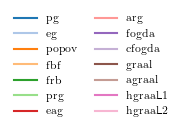

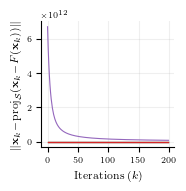

In [1]:
import numpy as np
import scipy as sp
import cvxpy as cp
import matplotlib.pyplot as plt

from utils import *
from monviso import VI

np.random.rand(2024)

# State and input sizes, number of agents, and time steps
n, m, N, T = 13, 4, 5, 3

# Problem data
A = np.random.rand(n, n)
B = [np.random.rand(n, m) for _ in range(N)]
Q = [random_positive_definite_matrix(2, 4, n) for _ in range(N)]
R = [random_positive_definite_matrix(1, 2, m) for _ in range(N)]
P = np.random.rand(n, n)
Q_bar = [sp.linalg.block_diag(np.kron(I(T - 1), Q[i]), P) for i in range(N)]
G = [
    np.kron(I(T), B[i])
    + np.kron(
        e(0, T),
        np.vstack([np.linalg.matrix_power(A, t) @ B[i] for t in range(T)]),
    )
    for i in range(N)
]
H = np.vstack([np.linalg.matrix_power(A, t) for t in range(1, T + 1)])
x0 = np.random.rand(n)

# Define the mapping
F1 = np.vstack([G[i].T @ Q_bar[i] for i in range(N)])
F2 = np.hstack(G)
F3 = sp.linalg.block_diag(*[np.kron(I(T), R[i]) for i in range(N)])
F = lambda u: F1 @ (F2 @ u + H @ x0) + F3 @ u
L = np.linalg.norm(F1 @ F2 + F3, 2) + 1

# Define a constraints set for the collective input
S = [lambda u: u >= 0]

# Define the VI and the initial(s) points
lqg = VI(m * T * N, F, S=S)
u0 = [np.random.rand(m * T * N) for _ in range(2)]

# Solve the VI using the available algorithms
max_iter = 200
for algorithm, params in cases(u0, L, excluded={"cfogda", "fogda"}).items():
    print(f"Using: {algorithm}")
    sol = lqg.solution(
        algorithm,
        params,
        max_iter,
        log_path=f"logs/linear-quadratic-game/{algorithm}.log",
    )

plot_results(
    "logs/linear-quadratic-game",
    "figs/linear-quadratic-game.pdf",
    r"$\|\mathbf{x}_k \! - \! \text{proj}_{\mathcal{S}}(\mathbf{x}_k \! - \! F(\mathbf{x}_k))\|$",
)